<a href="https://colab.research.google.com/github/aguilarafa2010/Aplicacao_Multimidia/blob/main/V2Classificacao_Doenca_Pulmonar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas

# Load the images from the dataset (1000 images, 10 different classes)
from imutils import paths
from google.colab.patches import cv2_imshow
import os, cv2

import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import itertools

import numpy as np
from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from skimage import io, util
from skimage.feature import local_binary_pattern, daisy
from skimage.color import rgb2gray, rgb2hsv, label2rgb
from skimage.filters import threshold_otsu, threshold_local, median
from skimage.transform import resize
from skimage.measure import regionprops
from skimage.morphology import label

In [ ]:
# Model Fine Tuning
import numpy as np
import pandas as pd
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import tensorflow as tf
import keras.utils

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import numpy as np
import itertools

from keras.preprocessing.image import ImageDataGenerator

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers import MaxPooling2D, ZeroPadding2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import keras.optimizers
from keras import regularizers
import keras
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt
import matplotlib.style as sty
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

plt.rcParams["figure.figsize"] = [20,5]
sns.set_style("ticks")

## Coleta dos Dados

In [ ]:
# general path
path="/content/drive/MyDrive/Trabalho/Pós Graduação/Aplicação Multimídia/"
shared = "Raw Dataset (RYDLS-20)/"

In [ ]:
# List of paths 
file_list=[]
file_list.append(os.listdir(path + shared + "COVID-19"))
file_list.append(os.listdir(path + shared + "MERS"))
file_list.append(os.listdir(path + shared + "Normal"))
file_list.append(os.listdir(path + shared + "Pneumocystis"))
file_list.append(os.listdir(path + shared + "SARS"))
file_list.append(os.listdir(path + shared + "Streptococcus"))
file_list.append(os.listdir(path + shared + "Varicella"))

# list of classes
class_names = ['COVID-19', 'MERS', 'Normal', 'Pneumocystis', 'SARS', 'Streptococcus', 'Varicella'] 

## Pré Processamento e Extração de Características

LBP (Local Binary Patterns)

In [ ]:
# settings for LBP
radius = 3
n_points = 8 * radius
METHOD = 'uniform'

In [ ]:
lbp=[]
lbp_flatten=[]

y = []
# Feature extraction
for classes_files, classe in zip (file_list, range(7)):
  for i in range(len(classes_files)):
    try:
      name = str(class_names[classe]) + str('/') + str(classes_files[i]) 
      print(name)
      imagem = rgb2gray(cv2.imread(f'{path}{shared}{name}', cv2.IMREAD_UNCHANGED))
      imagem = cv2.resize(imagem,(224,224))
      print('Original Dimensions : ',imagem.shape)

      lbp.append(local_binary_pattern(imagem, n_points, radius, METHOD))
      lbp_flatten.append(lbp[i].flatten())

      y.append(classe)
    except Exception as e:
      print(str(e))

X = lbp_flatten

print('X', np.shape(X))
print('y', np.shape(y))

COVID-19/1082.jpg
Original Dimensions :  (224, 224)
COVID-19/1066.jpg
Original Dimensions :  (224, 224)
COVID-19/1097.jpg
Original Dimensions :  (224, 224)
COVID-19/1067.jpg
Original Dimensions :  (224, 224)
COVID-19/1071.jpg
Original Dimensions :  (224, 224)
COVID-19/1073.jpg
Original Dimensions :  (224, 224)
COVID-19/1070.jpg
Original Dimensions :  (224, 224)
COVID-19/1072.jpg
Original Dimensions :  (224, 224)
COVID-19/1069.jpg
Original Dimensions :  (224, 224)
COVID-19/1068.jpg
Original Dimensions :  (224, 224)
COVID-19/1120.jpg
Original Dimensions :  (224, 224)
COVID-19/1078.jpg
Original Dimensions :  (224, 224)
COVID-19/1081.jpg
Original Dimensions :  (224, 224)
COVID-19/1080.jpg
Original Dimensions :  (224, 224)
COVID-19/1083.jpg
Original Dimensions :  (224, 224)
COVID-19/1087.jpg
Original Dimensions :  (224, 224)
COVID-19/1084.jpg
Original Dimensions :  (224, 224)
COVID-19/1086.jpg
Original Dimensions :  (224, 224)
COVID-19/1085.jpg
Original Dimensions :  (224, 224)
COVID-19/107

# Gerando os Arquivos Tratados

In [ ]:
#Saving the extracted features (deep) in a csv file
np.save('X', X)

# Saving the classes in a csv file
df_class = pd.DataFrame(y)
df_class.to_csv('y.csv', header=False, index=False)

print('Quantidade de Classes', len(y))
print('Quantidade de fatores', len(X))

Quantidade de Classes 1144
Quantidade de fatores 1144


In [ ]:
# Load the images and the corresponding labels
y = pd.read_csv(f'y.csv', header=None)
y=y.to_numpy()
y=np.ravel(y)
print(y.shape)

X=np.load(f'X.npy')
print(X.shape)

(1144,)
(1144, 50176)


#Plote das classes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb86437790>]],
      dtype=object)

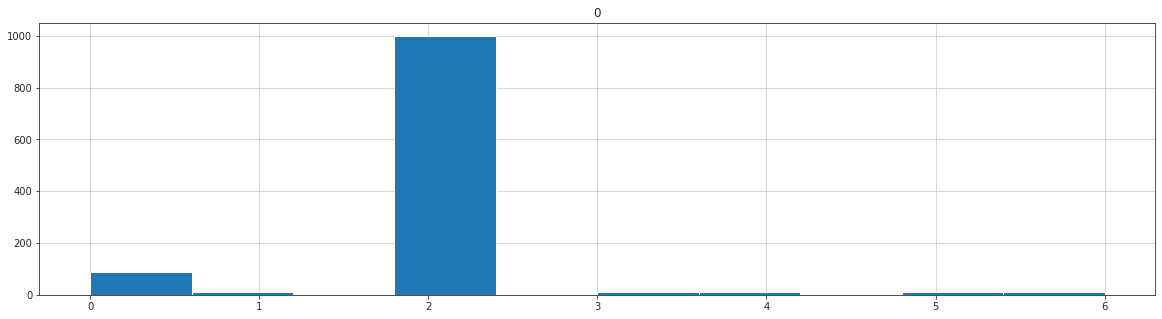

In [ ]:
grupos = pd.DataFrame(y)
grupos.hist()

# Funções Gerais


In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
#Função para realizar e plotar a matrix de confusão 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)
  
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
   
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
    
def hist(ax, lbp):
  n_bins = int(lbp.max() + 1)
  return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor='0.5')

def stats(y_test, preds):
  acc = metrics.accuracy_score(y_test, preds)
  print('Accuracy:', f'{acc:.4f}')

  prec_micro = metrics.precision_score(y_test, preds, average='micro')
  print('Precision (Micro):', f'{prec_micro:.4f}')

  prec_macro = metrics.precision_score(y_test, preds, average='macro')
  print('Precision (Macro):', f'{prec_macro:.4f}')

  rec_micro = metrics.recall_score(y_test, preds, average='micro')
  print('Recall (Micro):', f'{rec_micro:.4f}')

  rec_macro = metrics.recall_score(y_test, preds, average='macro')
  print('Recall (Macro):', f'{rec_macro:.4f}')

  f1_micro = metrics.f1_score(y_test, preds, average='micro')
  print('F1 (Micro):', f'{f1_micro:.4f}')

  f1_macro = metrics.f1_score(y_test, preds, average='macro')
  print('F1 (Macro):', f'{f1_macro:.4f}')
  return

## Modelos de Classificação

In [67]:
classes = ['COVID-19', 'MERS', 'Normal', 'Pneumocystis', 'SARS', 'Streptococcus', 'Varicella']  

def run_models_knn(X_train, X_test, y_train, y_test):
  # print('#####################################################################')

  n=4
  knn = KNeighborsClassifier(n_neighbors=n, metric= 'euclidean')
  knn.fit(X_train, y_train)
  preds = knn.predict(X_test)

  cm = confusion_matrix(y_test, preds)
  cm_plot_labels = classes
  plot_confusion_matrix(cm, cm_plot_labels, title ='Confusion Matrix --- KNN')
  plt.show()

  stats(y_test, preds)

def run_models_svm(X_train, X_test, y_train, y_test):
  # print('#####################################################################')

  svmach = svm.SVC(kernel='rbf', class_weight='balanced')
  svmach.fit(X_train, y_train)
  preds = svmach.predict(X_test)

  cm = confusion_matrix(y_test, preds)
  cm_plot_labels = classes
  plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix --- SVM')
  plt.show()

  stats(y_test, preds)

def run_models_lr(X_train, X_test, y_train, y_test):
  # print('#####################################################################')
  # Logistic Regression

  logreg = LogisticRegression(solver='lbfgs')
  logreg = logreg.fit(X_train, y_train)
  preds = logreg.predict(X_test)  

  cm = confusion_matrix(y_test, preds)
  cm_plot_labels = classes
  plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix --- Logistic Regression')
  plt.show()

  stats(y_test, preds)

def run_models_nb(X_train, X_test, y_train, y_test):
  # print('#####################################################################')
  # Naive Bayes
  
  naiveb = GaussianNB( )
  naiveb = naiveb.fit(X_train, y_train)
  preds = naiveb.predict(X_test)  
  
  cm = confusion_matrix(y_test, preds)
  cm_plot_labels = classes
  plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix --- Naive Bayes')
  plt.show()

  stats(y_test, preds)
  save_model(naiveb, classes, 'naive_bayes')
def run_models_dt(X_train, X_test, y_train, y_test):
  # print('#####################################################################')
  # Decision Tree
  
  tree_model = tree.DecisionTreeClassifier()
  tree_model = tree_model.fit(X_train, y_train)
  preds = tree_model.predict(X_test)  

  cm = confusion_matrix(y_test, preds)
  cm_plot_labels = classes
  plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix --- Decision Tree')
  plt.show()

  stats(y_test, preds)

def run_models_rt(X_train, X_test, y_train, y_test):
  # print('#####################################################################')
  # # Random Forest
  
  random_forest = RandomForestClassifier(criterion='entropy', class_weight='balanced')
  random_forest = random_forest.fit(X_train, y_train)
  preds = random_forest.predict(X_test)  

  cm = confusion_matrix(y_test, preds)
  cm_plot_labels = classes
  plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix --- Random Forest')
  plt.show()

  stats(y_test, preds)

## Etapa de Treinamento,  Teste e Avaliação dos Resultados

In [ ]:
# Machine Learning Process - 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Data normalization
trainX, testX = prep_pixels(X_train, X_test)

print('Dados de treino:', len(X_test))
print('Classes e quantidade de amostras --- y_train:', dict(Counter(y_train)))
print('Classes e quantidade de amostras --- y_test:', dict(Counter(y_test)))



Dados de treino: 344
Classes e quantidade de amostras --- y_train: {0: 63, 1: 7, 2: 699, 5: 8, 4: 8, 3: 8, 6: 7}
Classes e quantidade de amostras --- y_test: {2: 301, 0: 27, 4: 3, 3: 3, 1: 3, 6: 3, 5: 4}


Confusion matrix, without normalization
[[ 23   0   4   0   0   0   0]
 [  3   0   0   0   0   0   0]
 [291   0  10   0   0   0   0]
 [  2   0   1   0   0   0   0]
 [  2   0   1   0   0   0   0]
 [  2   0   2   0   0   0   0]
 [  2   0   1   0   0   0   0]]


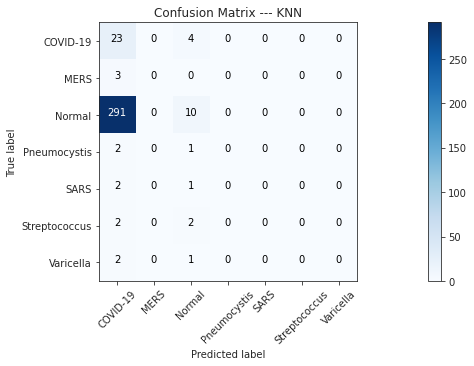

Accuracy: 0.0959
Precision (Micro): 0.0959
Precision (Macro): 0.0853
Recall (Micro): 0.0959
Recall (Macro): 0.1264
F1 (Micro): 0.0959
F1 (Macro): 0.0276


In [ ]:
run_models_knn(X_train, X_test, y_train, y_test)

Confusion matrix, without normalization
[[  0   1  26   0   0   0   0]
 [  0   0   0   0   0   0   3]
 [ 15   1 284   0   0   1   0]
 [  0   1   0   0   0   0   2]
 [  0   0   0   1   0   0   2]
 [  0   2   0   1   0   0   1]
 [  0   3   0   0   0   0   0]]


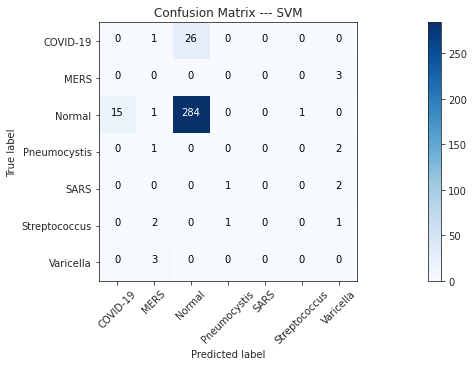

Accuracy: 0.8256
Precision (Micro): 0.8256
Precision (Macro): 0.1309
Recall (Micro): 0.8256
Recall (Macro): 0.1348
F1 (Micro): 0.8256
F1 (Macro): 0.1328


In [ ]:
run_models_svm(X_train, X_test, y_train, y_test)


Confusion matrix, without normalization
[[  0   0  27   0   0   0   0]
 [  3   0   0   0   0   0   0]
 [ 16   0 284   0   0   1   0]
 [  2   0   1   0   0   0   0]
 [  1   0   1   0   0   1   0]
 [  1   0   2   0   1   0   0]
 [  1   0   2   0   0   0   0]]


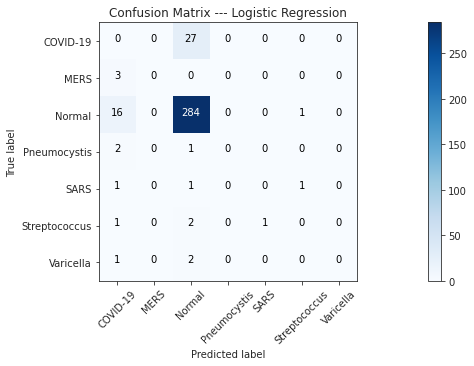

Accuracy: 0.8256
Precision (Micro): 0.8256
Precision (Macro): 0.1280
Recall (Micro): 0.8256
Recall (Macro): 0.1348
F1 (Micro): 0.8256
F1 (Macro): 0.1313


In [ ]:
run_models_lr(X_train, X_test, y_train, y_test)

Confusion matrix, without normalization
[[  9   1  17   0   0   0   0]
 [  0   0   0   0   0   0   3]
 [ 25   0 274   0   0   1   1]
 [  0   1   0   0   0   0   2]
 [  0   0   0   1   0   0   2]
 [  0   2   0   1   0   0   1]
 [  0   3   0   0   0   0   0]]


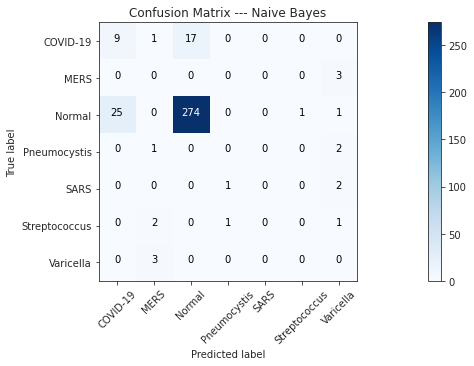

Accuracy: 0.8227
Precision (Micro): 0.8227
Precision (Macro): 0.1723
Recall (Micro): 0.8227
Recall (Macro): 0.1777
F1 (Micro): 0.8227
F1 (Macro): 0.1744
Classe da imagem teste - Normal


In [74]:
run_models_nb(X_train, X_test, y_train, y_test)

Confusion matrix, without normalization
[[  3   1  23   0   0   0   0]
 [  3   0   0   0   0   0   0]
 [ 50   1 250   0   0   0   0]
 [  2   1   0   0   0   0   0]
 [  3   0   0   0   0   0   0]
 [  3   1   0   0   0   0   0]
 [  2   1   0   0   0   0   0]]


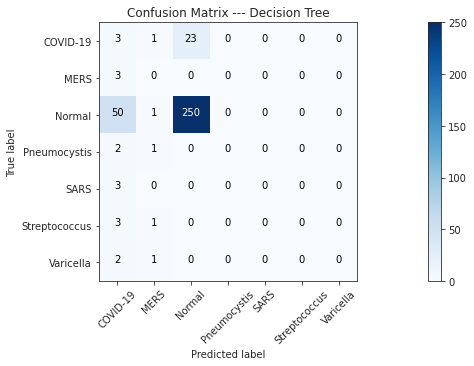

Accuracy: 0.7355
Precision (Micro): 0.7355
Precision (Macro): 0.1373
Recall (Micro): 0.7355
Recall (Macro): 0.1345
F1 (Micro): 0.7355
F1 (Macro): 0.1337


In [ ]:
run_models_dt(X_train, X_test, y_train, y_test)

Confusion matrix, without normalization
[[  0   1  26   0   0   0   0]
 [  0   0   0   0   1   2   0]
 [ 15   1 284   0   0   1   0]
 [  0   1   0   0   1   1   0]
 [  0   0   0   1   0   1   1]
 [  0   2   0   1   0   0   1]
 [  0   2   0   1   0   0   0]]


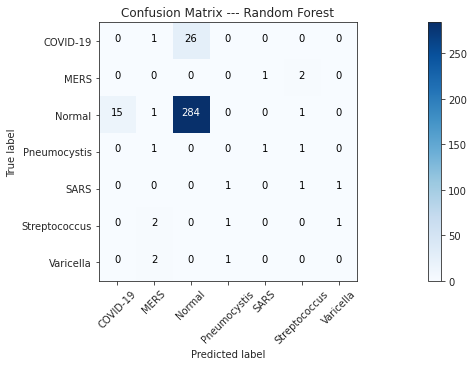

Accuracy: 0.8256
Precision (Micro): 0.8256
Precision (Macro): 0.1309
Recall (Micro): 0.8256
Recall (Macro): 0.1348
F1 (Micro): 0.8256
F1 (Macro): 0.1328


In [ ]:
run_models_rt(X_train, X_test, y_train, y_test)


## Salvando o modelo

In [73]:
# Saving the fine tuned model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import pickle

# list of classes
def save_model(model, classes, model_name):
  pickle.dump(model, open(f'{model_name}_model', 'wb'))

 
  path = '/content/teste1.jpg'

  # Applying the model
  # load an image from file

  imagem = rgb2gray(cv2.imread(path, cv2.IMREAD_UNCHANGED))
  imagem = cv2.resize(imagem,(224,224))

  lbp = local_binary_pattern(imagem, n_points, radius, METHOD)
  lbp_flatten = lbp.flatten()

  # load the model from disk
  loaded_model = pickle.load(open('naive_bayes_model', 'rb'))
  result = loaded_model.predict([lbp_flatten])
  print(f'Classe da imagem teste - {classes[result[0]]}')